Read In the File

In [2]:
import pandas as pd
df = pd.read_csv("air_quality.csv")
# df.describe()

Transform the Data (Air Quality)

In [3]:
# Do mapping function on the AQ
aq_mapping = {
    "Hazardous": 1,
    "Poor": 2,
    "Moderate": 3,
    "Good": 4
}

df["Air Quality"] = df["Air Quality"].map(aq_mapping)

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,4
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,4


1. "Proximity to Industrial Areas" vs "CO"

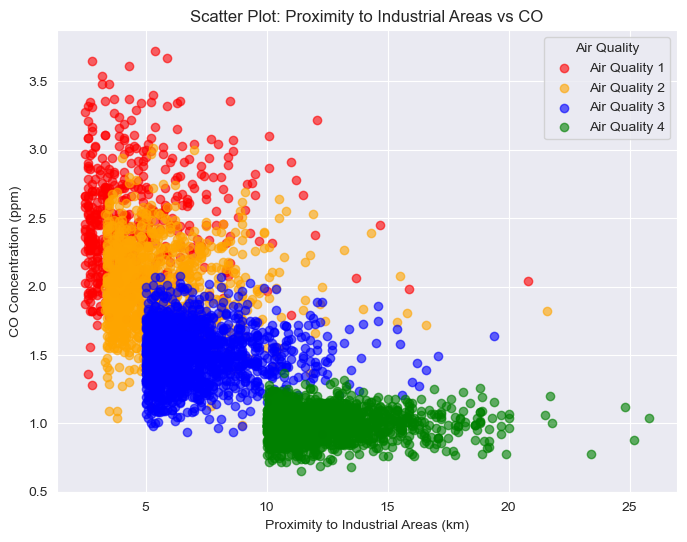

Pearson Correlation Coefficients by Air Quality Level:
Air Quality 1: r = 0.07
Air Quality 2: r = -0.02
Air Quality 3: r = -0.02
Air Quality 4: r = -0.01

Overall Correlation (All Data): r = -0.71


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

color_mapping = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}
correlation_values = {}


plt.figure(figsize=(8, 6))
for aq_class, color in color_mapping.items():
    subset = df[df["Air Quality"] == aq_class]

    correlation = subset["Proximity_to_Industrial_Areas"].corr(subset["CO"])
    correlation_values[aq_class] = correlation

    plt.scatter(subset["Proximity_to_Industrial_Areas"], subset["CO"],
                color=color, label=f"Air Quality {aq_class}", alpha=0.6)

overall_corr = df["Proximity_to_Industrial_Areas"].corr(df["CO"])

plt.xlabel("Proximity to Industrial Areas (km)")
plt.ylabel("CO Concentration (ppm)")
plt.title("Scatter Plot: Proximity to Industrial Areas vs CO")
plt.legend(title="Air Quality")
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficients by Air Quality Level:")
for aq_class, corr_value in correlation_values.items():
    print(f"Air Quality {aq_class}: r = {corr_value:.2f}")

print(f"\nOverall Correlation (All Data): r = {overall_corr:.2f}")



2. PM2.5 vs PM10

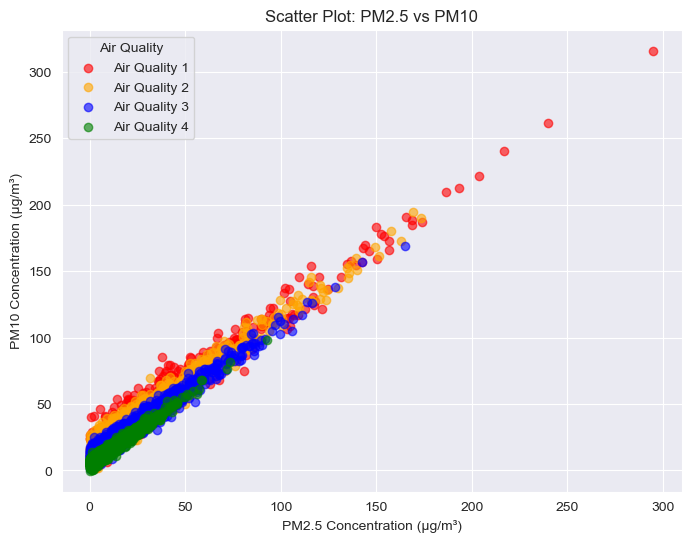

In [5]:
plt.figure(figsize=(8, 6))
for aq_class, color in color_mapping.items():
    subset = df[df["Air Quality"] == aq_class]
    plt.scatter(subset["PM2.5"], subset["PM10"],
                color=color, label=f"Air Quality {aq_class}", alpha=0.6)

plt.xlabel("PM2.5 Concentration (µg/m³)")
plt.ylabel("PM10 Concentration (µg/m³)")
plt.title("Scatter Plot: PM2.5 vs PM10")
plt.legend(title="Air Quality")
plt.grid(True)
plt.show()

3. Histogram About the Humidity

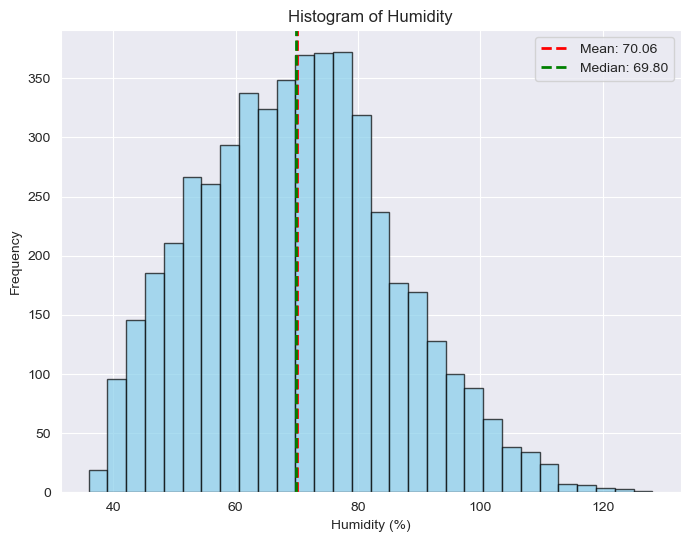

Mean Humidity: 70.06
Standard Deviation: 15.86
Median Humidity: 69.80


In [6]:
# Mean/Std/Median
mean_humidity = df["Humidity"].mean()
std_humidity = df["Humidity"].std()
median_humidity = df["Humidity"].median()

plt.figure(figsize=(8, 6))
plt.hist(df["Humidity"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(mean_humidity, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_humidity:.2f}")
plt.axvline(median_humidity, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_humidity:.2f}")

plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Humidity")
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Humidity: {mean_humidity:.2f}")
print(f"Standard Deviation: {std_humidity:.2f}")
print(f"Median Humidity: {median_humidity:.2f}")

4. Histogram "Proximity to Industrial Areas"

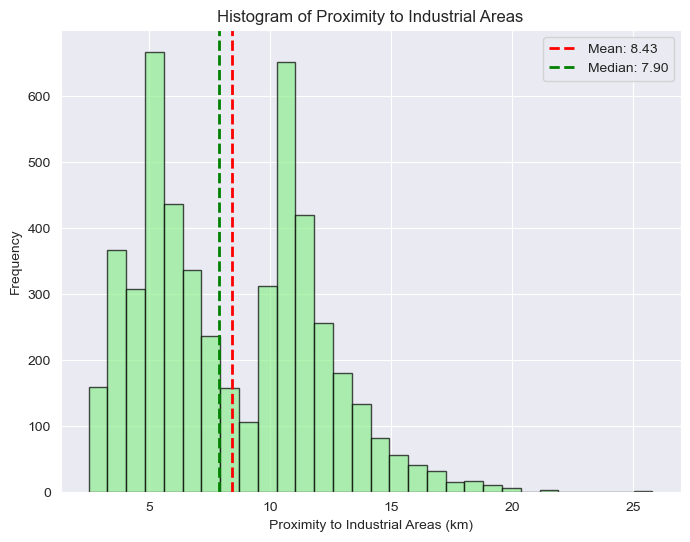

Mean Proximity: 8.43 km
Standard Deviation: 3.61 km
Median Proximity: 7.90 km


In [7]:
# Mean/Std/Median
mean_proximity = df["Proximity_to_Industrial_Areas"].mean()
std_proximity = df["Proximity_to_Industrial_Areas"].std()
median_proximity = df["Proximity_to_Industrial_Areas"].median()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df["Proximity_to_Industrial_Areas"], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)

# Lines on the diagram
plt.axvline(mean_proximity, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_proximity:.2f}")
plt.axvline(median_proximity, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_proximity:.2f}")

plt.xlabel("Proximity to Industrial Areas (km)")
plt.ylabel("Frequency")
plt.title("Histogram of Proximity to Industrial Areas")
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Proximity: {mean_proximity:.2f} km")
print(f"Standard Deviation: {std_proximity:.2f} km")
print(f"Median Proximity: {median_proximity:.2f} km")

5. Scatter Plot Matrix: Temperature, PM2.5, CO, and Proximity to Industrial Areas

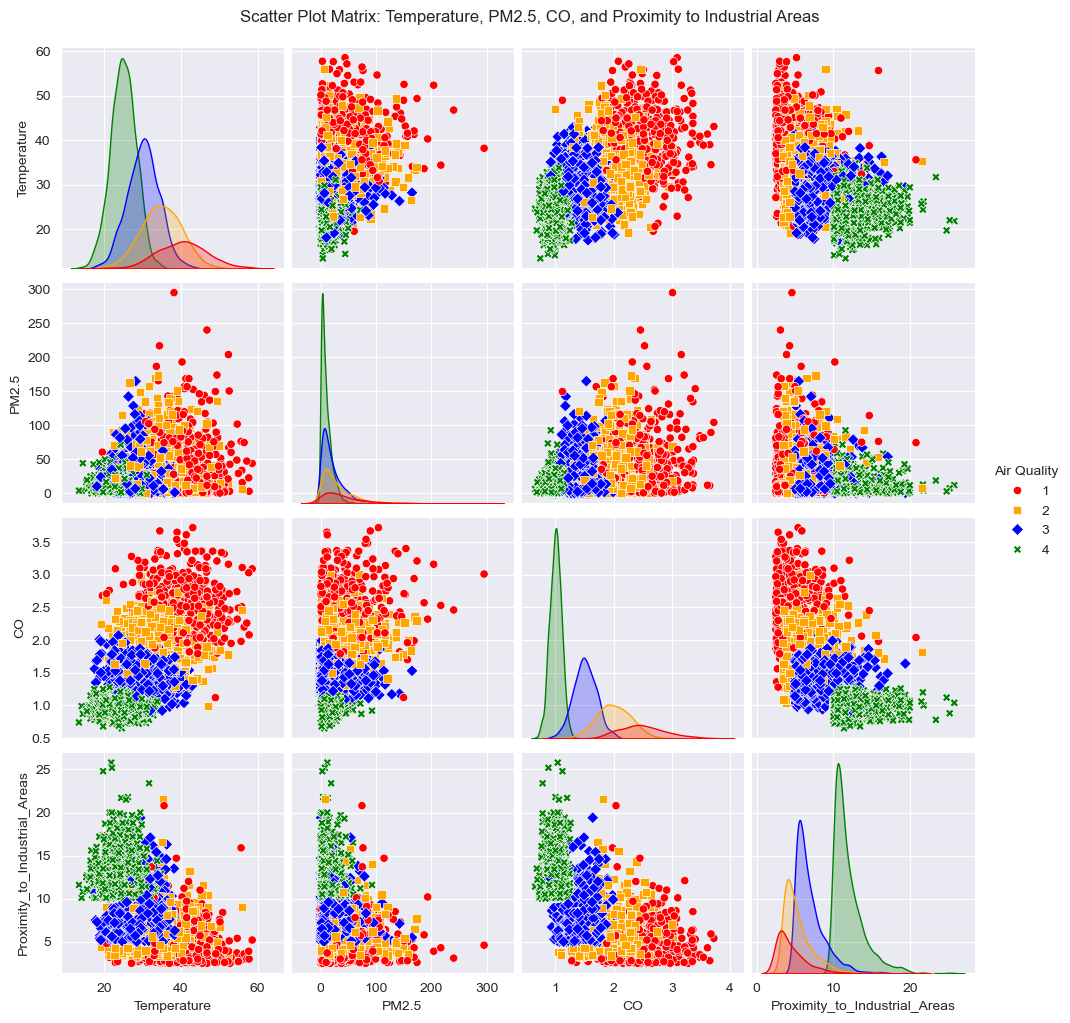

Pearson Correlation Coefficients (Ignore Air Quality):
                               Temperature     PM2.5        CO  \
Temperature                       1.000000  0.323840  0.685258   
PM2.5                             0.323840  1.000000  0.395179   
CO                                0.685258  0.395179  1.000000   
Proximity_to_Industrial_Areas    -0.589564 -0.315766 -0.707581   
Air Quality                      -0.753567 -0.418171 -0.912534   

                               Proximity_to_Industrial_Areas  Air Quality  
Temperature                                        -0.589564    -0.753567  
PM2.5                                              -0.315766    -0.418171  
CO                                                 -0.707581    -0.912534  
Proximity_to_Industrial_Areas                       1.000000     0.773637  
Air Quality                                         0.773637     1.000000  

Correlation of CO with other attributes three attributes (Ignore Air Quality):
Temperature 

In [15]:
selected_columns = ["Temperature", "PM2.5", "CO", "Proximity_to_Industrial_Areas", "Air Quality"]

sns.pairplot(df[selected_columns], hue="Air Quality", palette=color_mapping, markers=["o", "s", "D", "X"], height=2.5)
plt.suptitle("Scatter Plot Matrix: Temperature, PM2.5, CO, and Proximity to Industrial Areas", y=1.02)
plt.show()

correlation_matrix = df[selected_columns].corr()

print("Pearson Correlation Coefficients (Ignore Air Quality):")
print(correlation_matrix)

co_correlation = correlation_matrix["CO"]
print("\nCorrelation of CO with other attributes three attributes (Ignore Air Quality):")
print(co_correlation)


## 6. Boxplot for Air Quality = "Poor"

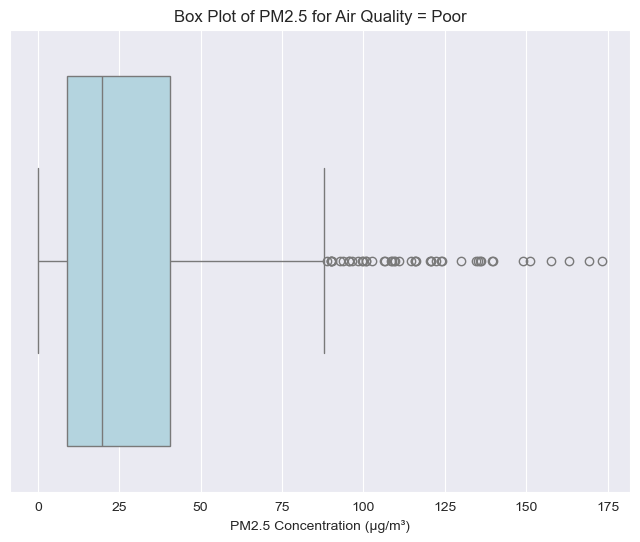

Q1: 8.9
Median (Q2): 19.85
Q3: 40.5
IQR: 31.6
Min: 0.1
Max: 173.2
Number of outliers: 46


In [10]:
poor_air_quality_df = df[df["Air Quality"] == 2]

plt.figure(figsize=(8, 6))
sns.boxplot(x=poor_air_quality_df["PM2.5"], color='lightblue')

plt.title("Box Plot of PM2.5 for Air Quality = Poor")
plt.xlabel("PM2.5 Concentration (µg/m³)")
plt.show()

pm25_stats = poor_air_quality_df["PM2.5"].describe()

# IQR
Q1 = pm25_stats["25%"]
Q3 = pm25_stats["75%"]
IQR = Q3 - Q1
min_value = pm25_stats["min"]
max_value = pm25_stats["max"]
median = pm25_stats["50%"]

print(f"Q1: {Q1}")
print(f"Median (Q2): {median}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")

# Calculate Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get Outliers
outliers = poor_air_quality_df[(poor_air_quality_df["PM2.5"] < lower_bound) |
                               (poor_air_quality_df["PM2.5"] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")

## 7.  Box plot for attribute "CO" for the instances of "Air Quality" class "Poor" and class "Moderate"

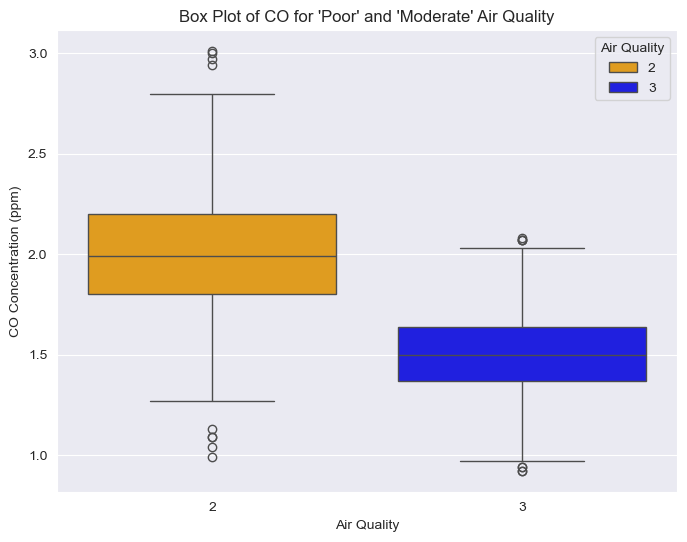

In [11]:
poor_moderate_df = df[df["Air Quality"].isin([2, 3])]  # 2: Poor, 3: Moderate

plt.figure(figsize=(8, 6))
sns.boxplot(x="Air Quality", y="CO", data=poor_moderate_df, hue="Air Quality", palette={2: 'orange', 3: 'blue'})

plt.title("Box Plot of CO for 'Poor' and 'Moderate' Air Quality")
plt.xlabel("Air Quality")
plt.ylabel("CO Concentration (ppm)")
plt.show()

## 8. PCA on 9 attributes

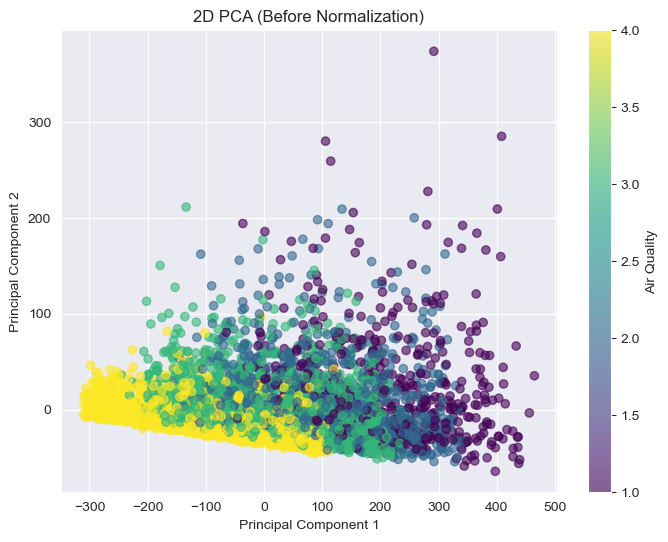

Explained Variance Ratio: [0.9386382  0.04787276]


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


attributes = ["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"]
df_attributes = df[attributes]

# 2D PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_attributes)

#
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Draw 2D PCA scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df["Air Quality"], cmap='viridis', alpha=0.6)
plt.title("2D PCA (Before Normalization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Air Quality')
plt.show()

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

### After z-score normalization

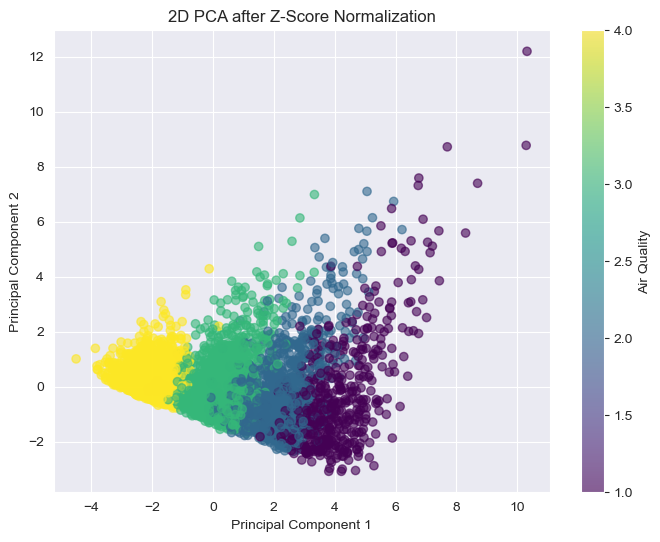

Explained Variance Ratio after Z-Score Normalization: [0.55721851 0.14969909]


In [14]:
scaler_zscore = StandardScaler()
df_zscore = scaler_zscore.fit_transform(df_attributes)

pca_zscore = PCA(n_components=2)
pca_result_zscore = pca_zscore.fit_transform(df_zscore)

df_pca_zscore = pd.DataFrame(data=pca_result_zscore, columns=["PC1", "PC2"])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_zscore["PC1"], df_pca_zscore["PC2"], c=df["Air Quality"], cmap='viridis', alpha=0.6)
plt.title("2D PCA after Z-Score Normalization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Air Quality')
plt.show()

print(f"Explained Variance Ratio after Z-Score Normalization: {pca_zscore.explained_variance_ratio_}")

### After Min-Max normalization

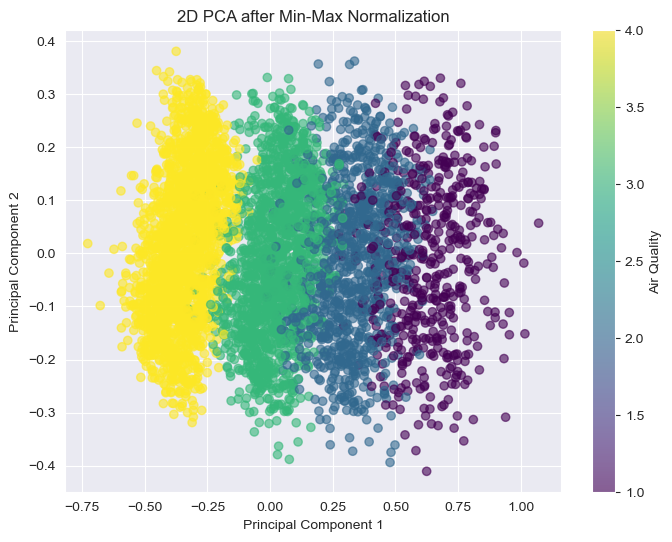

Explained Variance Ratio after Min-Max Normalization: [0.59660027 0.10332071]


In [15]:
scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df_attributes)

pca_minmax = PCA(n_components=2)
pca_result_minmax = pca_minmax.fit_transform(df_minmax)

df_pca_minmax = pd.DataFrame(data=pca_result_minmax, columns=["PC1", "PC2"])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_minmax["PC1"], df_pca_minmax["PC2"], c=df["Air Quality"], cmap='viridis', alpha=0.6)
plt.title("2D PCA after Min-Max Normalization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Air Quality')
plt.show()

print(f"Explained Variance Ratio after Min-Max Normalization: {pca_minmax.explained_variance_ratio_}")
